## Yelp Review Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_csv('yelp_review.csv')

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [4]:
reviews_df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
users_df = pd.read_csv('yelp_user.csv')

In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1326100 non-null  object 
 1   name                1325603 non-null  object 
 2   review_count        1326100 non-null  int64  
 3   yelping_since       1326100 non-null  object 
 4   friends             1326100 non-null  object 
 5   useful              1326100 non-null  int64  
 6   funny               1326100 non-null  int64  
 7   cool                1326100 non-null  int64  
 8   fans                1326100 non-null  int64  
 9   elite               1326100 non-null  object 
 10  average_stars       1326100 non-null  float64
 11  compliment_hot      1326100 non-null  int64  
 12  compliment_more     1326100 non-null  int64  
 13  compliment_profile  1326100 non-null  int64  
 14  compliment_cute     1326100 non-null  int64  
 15  compliment_list

In [7]:
users_df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


## Yelp Business Dataset

In [8]:
business_csv = pd.read_csv('yelp_business.csv')

In [9]:
business_csv.state.unique()

array(['AZ', 'PA', 'OH', 'BW', 'NV', 'ON', 'NC', 'WI', 'SC', 'QC', 'IL',
       'MLN', 'EDH', 'FIF', 'CHE', 'CO', 'NYK', 'NE', 'HLD', 'WLN', 'ABE',
       'WA', 'SCB', 'KHL', 'ESX', 'CMA', 'FAL', 'ELN', 'NY', 'PKN', 'ST',
       '01', 'CA', 'NLK', 'GLG', 'C', 'VS', 'IN', 'XGL', 'AL', 'STG',
       'VT', 'CS', '30', 'AR', 'SL', 'NI', 'BY', 'AK', 'FLN', nan, 'FL',
       'MN', '6', 'NTH', 'MT', 'B', 'GA', 'VA', 'DE', 'AB', 'HU', 'KY',
       '3', 'TAM', 'ZET', 'RCC', 'WHT'], dtype=object)

In [10]:
business_list = business_csv.city.unique().tolist()

In [11]:
# function to filter businesses according to city, review count and stars
def filter_business(df, city, review_count, stars):
    filtered_df = df[(df['city'] == city) & (df['categories'].str.contains("Restaurants"))
                               & (df['review_count'] > review_count)
                               & (df['stars'] >= stars)]
    return filtered_df

In [ ]:
restaurants_montreal = filter_business(business_csv, city = 'Montréal', review_count = 100, stars = 0)

In [12]:
restaurants_lasvegas = filter_business(business_csv, city = 'Las Vegas', review_count = 1000, stars = 3)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
801,PgJgpW4TKQ8IoALH2Yq-zA,"""Bayside Buffet at Mandalay Bay""",The Strip,"""3950 S Las Vegas Blvd""",Las Vegas,NV,89109,36.091219,-115.175804,3.0,1033,1,Arts & Entertainment;Restaurants;Buffets;Ameri...
4416,OVTZNSkSfbl3gVB9XQIJfw,"""Cravings Buffet""",The Strip,"""3400 Las Vegas Blvd S""",Las Vegas,NV,89109,36.121237,-115.174105,3.0,1252,1,American (Traditional);Buffets;Restaurants;Ame...
4439,JDZ6_yycNQFTpUZzLIKHUg,"""El Dorado Cantina""",NaN,"""3025 Sammy Davis Jr Dr""",Las Vegas,NV,89109,36.134915,-115.175822,4.0,1694,1,Lounges;Mexican;Restaurants;Bars;Nightlife
5068,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
6782,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169568,JyxHvtj-syke7m9rbza7mA,"""Sushi House Goyemon""",NaN,"""5255 S Decatur Blvd, Ste118""",Las Vegas,NV,89118,36.095059,-115.208878,3.5,1674,1,Sushi Bars;Japanese;Restaurants
170798,hihud--QRriCYZw1zZvW4g,"""Gangnam Asian BBQ Dining""",Eastside,"""4480 Paradise Rd""",Las Vegas,NV,89169,36.108898,-115.151261,4.5,3262,1,Asian Fusion;Restaurants;Barbeque;Korean;Tapas...
171529,IMLrj2klosTFvPRLv56cng,"""Honey Salt""",Westside,"""1031 S Rampart Blvd""",Las Vegas,NV,89145,36.160577,-115.292996,4.0,1206,1,Cafes;American (New);Restaurants
172099,pHJu8tj3sI8eC5aIHLFEfQ,"""Nora's Italian Cuisine""",NaN,"""5780 W Flamingo Rd""",Las Vegas,NV,89103,36.115052,-115.220284,4.0,1288,1,Italian;Wine Bars;Restaurants;Pizza;Bars;Event...


In [13]:
restaurants_lasvegas.neighborhood.unique()

array(['The Strip', nan, 'Downtown', 'Southwest', 'Chinatown', 'Eastside',
       'Spring Valley', 'Westside', 'Southeast', 'Summerlin',
       'Centennial'], dtype=object)

In [14]:
restaurants_lasvegas[restaurants_lasvegas['categories'].str.contains('Automotive')]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
124412,KskYqH1Bi7Z_61pH6Om8pg,"""Lotus of Siam""",Downtown,"""953 E Sahara Ave, Ste A5""",Las Vegas,NV,89104,36.14345,-115.14278,4.0,3964,1,Car Dealers;Thai;Automotive;Seafood;Bars;Wine ...


In [15]:
restaurants_lasvegas.categories.tolist()

results = []

for i in restaurants_lasvegas.categories.tolist():
    results.extend(i.split(";"))


In [16]:
set(results)

{'Active Life',
 'African',
 'American (New)',
 'American (Traditional)',
 'Arts & Entertainment',
 'Asian Fusion',
 'Automotive',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Beer',
 'Beer Bar',
 'Beer Garden',
 'Beer Gardens',
 'Brazilian',
 'Breakfast & Brunch',
 'Breweries',
 'British',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Butcher',
 'Cafes',
 'Cajun/Creole',
 'Car Dealers',
 'Caribbean',
 'Casinos',
 'Caterers',
 'Cheesesteaks',
 'Chinese',
 'Chocolatiers & Shops',
 'Cocktail Bars',
 'Coffee & Tea',
 'Comfort Food',
 'Creperies',
 'Dance Clubs',
 'Delis',
 'Desserts',
 'Dim Sum',
 'Diners',
 'Dive Bars',
 'Event Planning & Services',
 'Fish & Chips',
 'Food',
 'Food Delivery Services',
 'Food Stands',
 'French',
 'Gastropubs',
 'German',
 'Gluten-Free',
 'Grocery',
 'Hawaiian',
 'Hotels',
 'Hotels & Travel',
 'Indian',
 'Irish',
 'Italian',
 'Japanese',
 'Juice Bars & Smoothies',
 'Karaoke',
 'Korean',
 'Latin American',
 'Local Flavor',
 'Lounges',
 'Macarons',
 'Meat Shops',
 'Medit

In [17]:
restaurants_lasvegas[restaurants_lasvegas['categories'].str.contains('Breakfast & Brunch')]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
6782,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
19191,f4x1YBxkLrZg652xt2KR5g,"""Hash House A Go Go""",The Strip,"""3535 Las Vegas Blvd""",Las Vegas,NV,89109,36.118181,-115.171580,4.0,4774,1,American (New);Restaurants;Breakfast & Brunch
22750,d_L-rfS1vT3JMzgCUGtiow,"""Border Grill""",The Strip,"""3950 S Las Vegas Blvd""",Las Vegas,NV,89119,36.090067,-115.176973,4.0,1432,1,Restaurants;Breakfast & Brunch;Mexican;Tapas/S...
24586,XXW_OFaYQkkGOGniujZFHg,"""The Peppermill Restaurant & Fireside Lounge""",The Strip,"""2985 Las Vegas Blvd S""",Las Vegas,NV,89109,36.133667,-115.163095,4.0,2703,1,Bars;American (Traditional);Lounges;Nightlife;...
29100,FLMxWQO-ckCQmGZhU9OQgw,"""Carnival World Buffet""",NaN,"""Rio All-Suite Hotel & Casino, 3700 W Flamingo...",Las Vegas,NV,89103,36.117890,-115.189395,3.5,1374,0,Buffets;Restaurants;Breakfast & Brunch;Food
33562,HgdFqAvK31fB9sgBdOzo9g,"""Crêpe Expectations""",NaN,"""9500 S Eastern Ave, Ste 150""",Las Vegas,NV,89123,36.016494,-115.117099,4.5,1016,1,Restaurants;Creperies;Breakfast & Brunch
33592,sNVGdeOPeitJ3OWUQBINzQ,"""BabyStacks Cafe""",Spring Valley,"""4135 S Buffalo Dr, Ste 101""",Las Vegas,NV,89147,36.113635,-115.261438,4.0,1169,1,American (Traditional);Breakfast & Brunch;Cafe...
33985,3BCsAgo_1i4xMuTyLKMLRQ,"""SkinnyFATS""",NaN,"""6261 Dean Martin Dr""",Las Vegas,NV,89118,36.075969,-115.181724,4.5,1741,1,Restaurants;American (Traditional);Breakfast &...
36120,HhVmDybpU7L50Kb5A0jXTg,"""Guy Fieri's Vegas Kitchen & Bar""",The Strip,"""3535 S Las Vegas Blvd""",Las Vegas,NV,89109,36.118080,-115.172432,3.5,2674,1,American (New);Burgers;Restaurants;Pubs;Nightl...
43572,oXoVJ0xKv82cBo9U6oEjlQ,"""Chayo Mexican Kitchen + Tequila Bar""",The Strip,"""3545 S Las Vegas Blvd""",Las Vegas,NV,89109,36.117735,-115.171714,3.0,1105,1,Local Flavor;Restaurants;Breakfast & Brunch;Ba...


In [53]:
lasvegas_no_na_subset = restaurants_lasvegas[~restaurants_lasvegas['neighborhood'].isna()]
lasvegas_no_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
801,PgJgpW4TKQ8IoALH2Yq-zA,"""Bayside Buffet at Mandalay Bay""",The Strip,"""3950 S Las Vegas Blvd""",Las Vegas,NV,89109,36.091219,-115.175804,3.0,1033,1,Arts & Entertainment;Restaurants;Buffets;Ameri...
4416,OVTZNSkSfbl3gVB9XQIJfw,"""Cravings Buffet""",The Strip,"""3400 Las Vegas Blvd S""",Las Vegas,NV,89109,36.121237,-115.174105,3.0,1252,1,American (Traditional);Buffets;Restaurants;Ame...
5068,G-5kEa6E6PD5fkBRuA7k9Q,"""Giada""",The Strip,"""The Cromwell Las Vegas Resort & Casino, 3595 ...",Las Vegas,NV,89109,36.115059,-115.172109,3.5,2349,1,Italian;Restaurants
6782,rcaPajgKOJC2vo_l3xa42A,"""Bouchon at the Venezia Tower""",The Strip,"""3355 Las Vegas Blvd S, Venezia Tower, 10th fl...",Las Vegas,NV,89109,36.120955,-115.169853,4.0,3570,1,Breakfast & Brunch;Venues & Event Spaces;Event...
9454,aT_SsfZ6GQgJGyuIv1Hapw,"""Bouchon Bakery at the Venetian Casino""",The Strip,"""3355 Las Vegas Blvd S, Ste 10101, The Venetia...",Las Vegas,NV,89109,36.121774,-115.169229,4.0,1032,1,Restaurants;Bakeries;Macarons;Specialty Food;F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166920,yfxDa8RFOvJPQh0rNtakHA,"""Pho Kim Long""",Chinatown,"""4029 Spring Mountain Rd""",Las Vegas,NV,89102,36.126194,-115.193445,3.5,2594,1,Vietnamese;Chinese;Restaurants
167132,GJ_bXUPv672YwNg4TneJog,"""China Poblano""",The Strip,"""3708 Las Vegas Blvd S""",Las Vegas,NV,89109,36.109658,-115.174669,3.5,1399,1,Mexican;Asian Fusion;Chinese;Restaurants
170798,hihud--QRriCYZw1zZvW4g,"""Gangnam Asian BBQ Dining""",Eastside,"""4480 Paradise Rd""",Las Vegas,NV,89169,36.108898,-115.151261,4.5,3262,1,Asian Fusion;Restaurants;Barbeque;Korean;Tapas...
171529,IMLrj2klosTFvPRLv56cng,"""Honey Salt""",Westside,"""1031 S Rampart Blvd""",Las Vegas,NV,89145,36.160577,-115.292996,4.0,1206,1,Cafes;American (New);Restaurants


In [54]:
lasvegas_na_subset = restaurants_lasvegas[restaurants_lasvegas['neighborhood'].isna()]
lasvegas_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4439,JDZ6_yycNQFTpUZzLIKHUg,"""El Dorado Cantina""",NaN,"""3025 Sammy Davis Jr Dr""",Las Vegas,NV,89109,36.134915,-115.175822,4.0,1694,1,Lounges;Mexican;Restaurants;Bars;Nightlife
18386,zdE82PiD6wquvjYLyhOJNA,"""KoMex Fusion""",NaN,"""633 N Decatur Blvd, Ste H""",Las Vegas,NV,89107,36.179939,-115.206417,4.5,1171,1,Mexican;Korean;Restaurants;Asian Fusion
29100,FLMxWQO-ckCQmGZhU9OQgw,"""Carnival World Buffet""",NaN,"""Rio All-Suite Hotel & Casino, 3700 W Flamingo...",Las Vegas,NV,89103,36.117890,-115.189395,3.5,1374,0,Buffets;Restaurants;Breakfast & Brunch;Food
33562,HgdFqAvK31fB9sgBdOzo9g,"""Crêpe Expectations""",NaN,"""9500 S Eastern Ave, Ste 150""",Las Vegas,NV,89123,36.016494,-115.117099,4.5,1016,1,Restaurants;Creperies;Breakfast & Brunch
33985,3BCsAgo_1i4xMuTyLKMLRQ,"""SkinnyFATS""",NaN,"""6261 Dean Martin Dr""",Las Vegas,NV,89118,36.075969,-115.181724,4.5,1741,1,Restaurants;American (Traditional);Breakfast &...
73217,gx2yPrOJSwF1ApJYdGBWIw,"""JINYA Ramen Bar""",NaN,"""4860 W Flamingo Rd""",Las Vegas,NV,89103,36.115811,-115.206848,4.0,1171,1,Soup;Japanese;Ramen;Restaurants
89974,fL-b760btOaGa85OJ9ut3w,"""Rollin Smoke Barbeque""",NaN,"""3185 S Highland Dr, Ste 2""",Las Vegas,NV,89109,36.132188,-115.177096,4.5,2320,1,Restaurants;Soul Food;Burgers;Barbeque
92029,jWv5GUtEp30OD5L5C8c2DQ,"""Mr. Mamas""",NaN,"""5580 S Decatur Blvd, Ste 112""",Las Vegas,NV,89118,36.088774,-115.207338,4.5,1121,0,Restaurants;American (Traditional);Sandwiches;...
123599,awI4hHMfa7H0Xf0-ChU5hg,"""Oyster Bar""",NaN,"""2411 W Sahara Ave""",Las Vegas,NV,89102,36.142782,-115.174747,4.5,2125,1,Restaurants;Bars;Seafood;Nightlife
169568,JyxHvtj-syke7m9rbza7mA,"""Sushi House Goyemon""",NaN,"""5255 S Decatur Blvd, Ste118""",Las Vegas,NV,89118,36.095059,-115.208878,3.5,1674,1,Sushi Bars;Japanese;Restaurants


#### Fill NaN neighborhoods by searching the closest neighborhood from the restaurant

In [55]:
from geopy import distance

lasvegas_na_dict = lasvegas_na_subset.to_dict('records')
lasvegas_no_na_dict = lasvegas_no_na_subset.to_dict('records')

def get_closest_neighborhood(list_restaurants, location):
    # location is tuple of lat and long values
    closest_distance = 100
    closest_neighborhood = ""

    for i,r_dict in enumerate(list_restaurants):
        
        r_lat_long = (r_dict['latitude'], r_dict['longitude'])
        current_distance = distance.distance(location, r_lat_long).km

        # if current iteration of restaurant is closer 
        if current_distance < closest_distance:
            closest_distance = current_distance
            closest_neighborhood = r_dict['neighborhood']
        
    
    print(closest_distance)
    return closest_neighborhood
        

In [56]:
for na_rest in lasvegas_na_dict:
    location = (na_rest['latitude'], na_rest['longitude'])
    na_rest['neighborhood'] = get_closest_neighborhood(lasvegas_no_na_dict, location)

1.003487534150578
3.998623640821513
0.9909979509978943
4.372688892688882
0.8800865507986235
0.861748738694657
0.879887398938031
1.7213840310025705
1.3651222323130447
1.8286725607940286
1.4150850685618672


In [59]:
restaurants_lasvegas = pd.DataFrame(lasvegas_na_dict+lasvegas_no_na_dict)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,JDZ6_yycNQFTpUZzLIKHUg,"""El Dorado Cantina""",The Strip,"""3025 Sammy Davis Jr Dr""",Las Vegas,NV,89109,36.134915,-115.175822,4.0,1694,1,Lounges;Mexican;Restaurants;Bars;Nightlife
1,zdE82PiD6wquvjYLyhOJNA,"""KoMex Fusion""",Westside,"""633 N Decatur Blvd, Ste H""",Las Vegas,NV,89107,36.179939,-115.206417,4.5,1171,1,Mexican;Korean;Restaurants;Asian Fusion
2,FLMxWQO-ckCQmGZhU9OQgw,"""Carnival World Buffet""",Chinatown,"""Rio All-Suite Hotel & Casino, 3700 W Flamingo...",Las Vegas,NV,89103,36.117890,-115.189395,3.5,1374,0,Buffets;Restaurants;Breakfast & Brunch;Food
3,HgdFqAvK31fB9sgBdOzo9g,"""Crêpe Expectations""",Southeast,"""9500 S Eastern Ave, Ste 150""",Las Vegas,NV,89123,36.016494,-115.117099,4.5,1016,1,Restaurants;Creperies;Breakfast & Brunch
4,3BCsAgo_1i4xMuTyLKMLRQ,"""SkinnyFATS""",Southeast,"""6261 Dean Martin Dr""",Las Vegas,NV,89118,36.075969,-115.181724,4.5,1741,1,Restaurants;American (Traditional);Breakfast &...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,yfxDa8RFOvJPQh0rNtakHA,"""Pho Kim Long""",Chinatown,"""4029 Spring Mountain Rd""",Las Vegas,NV,89102,36.126194,-115.193445,3.5,2594,1,Vietnamese;Chinese;Restaurants
128,GJ_bXUPv672YwNg4TneJog,"""China Poblano""",The Strip,"""3708 Las Vegas Blvd S""",Las Vegas,NV,89109,36.109658,-115.174669,3.5,1399,1,Mexican;Asian Fusion;Chinese;Restaurants
129,hihud--QRriCYZw1zZvW4g,"""Gangnam Asian BBQ Dining""",Eastside,"""4480 Paradise Rd""",Las Vegas,NV,89169,36.108898,-115.151261,4.5,3262,1,Asian Fusion;Restaurants;Barbeque;Korean;Tapas...
130,IMLrj2klosTFvPRLv56cng,"""Honey Salt""",Westside,"""1031 S Rampart Blvd""",Las Vegas,NV,89145,36.160577,-115.292996,4.0,1206,1,Cafes;American (New);Restaurants


(array([11.,  0., 21.,  0.,  0., 70.,  0., 29.,  0.,  1.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

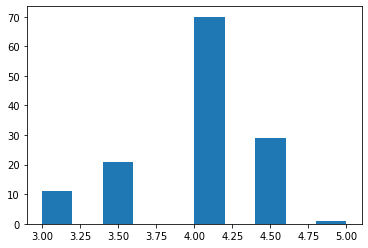

In [60]:
plt.hist(restaurants_lasvegas['stars'])

In [61]:
las_vegas_list = restaurants_lasvegas['business_id'].unique().tolist()

In [21]:
#users_above_10_list = users_df[users_df['review_count'] > 10]['user_id'].unique().tolist()

In [22]:
#len(users_above_10_list)

In [23]:
#reviews_df[(reviews_df['business_id'].isin(las_vegas_list)) & (reviews_df['review_id'].isin(users_above_10_list))]

In [62]:
lasvegas_reviews_df = reviews_df[reviews_df['business_id'].isin(las_vegas_list)]
lasvegas_reviews_df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
123,gN6GARS_BRr5UX2D3WAH0w,nOTl4aPC4tKHK35T3bNauQ,xVEtGucSRLk5pxxN0t4i6g,5,2012-08-23,We got recommendations for this place from my ...,0,0,0
194,uIhK5rQ5FoUqIV2z_9TyWA,tL2pS5UOmN6aAOi3Z-qFGg,ZibmYdOPKLlqDM9oR6xzOA,2,2013-04-01,I live very near this place and have been curi...,5,3,2
216,YfcyLNPWXL9ihdnLIsX_Yg,tL2pS5UOmN6aAOi3Z-qFGg,q3dJQtwZQrrurNT-1bNKgQ,4,2017-02-15,We've been wanting to try this restaurant for ...,1,0,0
266,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,5,2014-06-06,I've been here a half a dozen times over the y...,0,0,0
267,xGYGeu0zSTqLsUlG-_h6kQ,tL2pS5UOmN6aAOi3Z-qFGg,SVGApDPNdpFlEjwRQThCxA,4,2017-02-01,Stopped in here with my family for dinner toda...,1,0,0
...,...,...,...,...,...,...,...,...,...
5261517,RigXF5Z1pPeYYbFeyK9Awg,ZiMiC7Jkm4lOOL1-fcQpMQ,IhNASEZ3XnBHmuuVnWdIwA,5,2016-03-19,Great service! If you like the Lava Flow drink...,1,1,1
5261530,WdTjSIXnwvoDHy64qdCc8w,5WX0Mg2QewtJSLsU8DtzfA,XZbuPXdyA0ZtTu3AzqtQhg,5,2017-01-12,Love this place. This was my third time here a...,0,0,1
5261544,27Z-VPuN5iyHZZb-v3CH-A,1VNqisX6ppOX5bYNsoWFTA,RwMLuOkImBIqqYj4SSKSPg,5,2017-07-13,This is the best taco place we've ever been to...,0,0,0
5261556,S_PAL5ClyT8nvoeVUxEWsA,4Iwu57GSychxpqa4w4HAMQ,q3dJQtwZQrrurNT-1bNKgQ,5,2017-05-07,We had a romantic lunch. We loved the singer w...,1,0,1


In [63]:
lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)
lasvegas_reviews_df

C:\Users\raych\AppData\Local\Temp\ipykernel_16720\897761436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
123,gN6GARS_BRr5UX2D3WAH0w,nOTl4aPC4tKHK35T3bNauQ,xVEtGucSRLk5pxxN0t4i6g,1,2012-08-23,We got recommendations for this place from my ...,0,0,0
194,uIhK5rQ5FoUqIV2z_9TyWA,tL2pS5UOmN6aAOi3Z-qFGg,ZibmYdOPKLlqDM9oR6xzOA,0,2013-04-01,I live very near this place and have been curi...,5,3,2
216,YfcyLNPWXL9ihdnLIsX_Yg,tL2pS5UOmN6aAOi3Z-qFGg,q3dJQtwZQrrurNT-1bNKgQ,1,2017-02-15,We've been wanting to try this restaurant for ...,1,0,0
266,drJ1crfdfmuuie6vxQSUhA,tL2pS5UOmN6aAOi3Z-qFGg,XXW_OFaYQkkGOGniujZFHg,1,2014-06-06,I've been here a half a dozen times over the y...,0,0,0
267,xGYGeu0zSTqLsUlG-_h6kQ,tL2pS5UOmN6aAOi3Z-qFGg,SVGApDPNdpFlEjwRQThCxA,1,2017-02-01,Stopped in here with my family for dinner toda...,1,0,0
...,...,...,...,...,...,...,...,...,...
5261517,RigXF5Z1pPeYYbFeyK9Awg,ZiMiC7Jkm4lOOL1-fcQpMQ,IhNASEZ3XnBHmuuVnWdIwA,1,2016-03-19,Great service! If you like the Lava Flow drink...,1,1,1
5261530,WdTjSIXnwvoDHy64qdCc8w,5WX0Mg2QewtJSLsU8DtzfA,XZbuPXdyA0ZtTu3AzqtQhg,1,2017-01-12,Love this place. This was my third time here a...,0,0,1
5261544,27Z-VPuN5iyHZZb-v3CH-A,1VNqisX6ppOX5bYNsoWFTA,RwMLuOkImBIqqYj4SSKSPg,1,2017-07-13,This is the best taco place we've ever been to...,0,0,0
5261556,S_PAL5ClyT8nvoeVUxEWsA,4Iwu57GSychxpqa4w4HAMQ,q3dJQtwZQrrurNT-1bNKgQ,1,2017-05-07,We had a romantic lunch. We loved the singer w...,1,0,1


(array([ 71395.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 175088.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

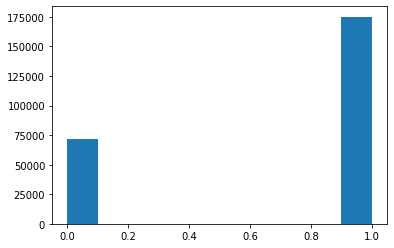

In [64]:
plt.hist(lasvegas_reviews_df['stars'])

## Combine reviews with business categories

In [65]:
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,JDZ6_yycNQFTpUZzLIKHUg,"""El Dorado Cantina""",The Strip,"""3025 Sammy Davis Jr Dr""",Las Vegas,NV,89109,36.134915,-115.175822,4.0,1694,1,Lounges;Mexican;Restaurants;Bars;Nightlife
1,zdE82PiD6wquvjYLyhOJNA,"""KoMex Fusion""",Westside,"""633 N Decatur Blvd, Ste H""",Las Vegas,NV,89107,36.179939,-115.206417,4.5,1171,1,Mexican;Korean;Restaurants;Asian Fusion
2,FLMxWQO-ckCQmGZhU9OQgw,"""Carnival World Buffet""",Chinatown,"""Rio All-Suite Hotel & Casino, 3700 W Flamingo...",Las Vegas,NV,89103,36.117890,-115.189395,3.5,1374,0,Buffets;Restaurants;Breakfast & Brunch;Food
3,HgdFqAvK31fB9sgBdOzo9g,"""Crêpe Expectations""",Southeast,"""9500 S Eastern Ave, Ste 150""",Las Vegas,NV,89123,36.016494,-115.117099,4.5,1016,1,Restaurants;Creperies;Breakfast & Brunch
4,3BCsAgo_1i4xMuTyLKMLRQ,"""SkinnyFATS""",Southeast,"""6261 Dean Martin Dr""",Las Vegas,NV,89118,36.075969,-115.181724,4.5,1741,1,Restaurants;American (Traditional);Breakfast &...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,yfxDa8RFOvJPQh0rNtakHA,"""Pho Kim Long""",Chinatown,"""4029 Spring Mountain Rd""",Las Vegas,NV,89102,36.126194,-115.193445,3.5,2594,1,Vietnamese;Chinese;Restaurants
128,GJ_bXUPv672YwNg4TneJog,"""China Poblano""",The Strip,"""3708 Las Vegas Blvd S""",Las Vegas,NV,89109,36.109658,-115.174669,3.5,1399,1,Mexican;Asian Fusion;Chinese;Restaurants
129,hihud--QRriCYZw1zZvW4g,"""Gangnam Asian BBQ Dining""",Eastside,"""4480 Paradise Rd""",Las Vegas,NV,89169,36.108898,-115.151261,4.5,3262,1,Asian Fusion;Restaurants;Barbeque;Korean;Tapas...
130,IMLrj2klosTFvPRLv56cng,"""Honey Salt""",Westside,"""1031 S Rampart Blvd""",Las Vegas,NV,89145,36.160577,-115.292996,4.0,1206,1,Cafes;American (New);Restaurants


In [68]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(restaurants_lasvegas, how = "inner", on='business_id')
lasvegas_reviews_df


,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
0,gN6GARS_BRr5UX2D3WAH0w,nOTl4aPC4tKHK35T3bNauQ,xVEtGucSRLk5pxxN0t4i6g,1,2012-08-23,We got recommendations for this place from my ...,0,0,0,"""Eiffel Tower""",...,"""3655 Las Vegas Blvd S""",Las Vegas,NV,89109,36.112477,-115.172189,4.0,1549,1,Steakhouses;Nightlife;Bars;French;Restaurants;...
1,Qnc2zkr-ld9nDJTzXmc4WQ,C_CYs2G3UFPng3MupCe5eQ,xVEtGucSRLk5pxxN0t4i6g,0,2015-04-06,"I really wanted to love this place, but I just...",1,1,1,"""Eiffel Tower""",...,"""3655 Las Vegas Blvd S""",Las Vegas,NV,89109,36.112477,-115.172189,4.0,1549,1,Steakhouses;Nightlife;Bars;French;Restaurants;...
2,qicHEB75WFOr9d8LNHqE8Q,l0-VQ8nA_oijpKlRB7dkow,xVEtGucSRLk5pxxN0t4i6g,1,2010-02-11,A beautiful restaurant that you would expect t...,1,0,0,"""Eiffel Tower""",...,"""3655 Las Vegas Blvd S""",Las Vegas,NV,89109,36.112477,-115.172189,4.0,1549,1,Steakhouses;Nightlife;Bars;French;Restaurants;...
3,4rppwJJ15o7LcjxEARRcfA,APdqZ02n-0L0jKpQ9hn-BA,xVEtGucSRLk5pxxN0t4i6g,1,2016-06-27,"Enjoyed our food, flavorful. We had Creamed sp...",0,0,0,"""Eiffel Tower""",...,"""3655 Las Vegas Blvd S""",Las Vegas,NV,89109,36.112477,-115.172189,4.0,1549,1,Steakhouses;Nightlife;Bars;French;Restaurants;...
4,FqKmtB_jZPYDM9Bzx4PZEQ,DQYMtGFO1-DUGB0yX3a4Qg,xVEtGucSRLk5pxxN0t4i6g,1,2010-03-15,My husband (fiance at the time) had our last m...,0,0,0,"""Eiffel Tower""",...,"""3655 Las Vegas Blvd S""",Las Vegas,NV,89109,36.112477,-115.172189,4.0,1549,1,Steakhouses;Nightlife;Bars;French;Restaurants;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246478,hiLGyxecIe1uG1WcikrzTQ,BCy-Hut597GtNvlnx3pB4Q,cJWbbvGmyhFiBpG_5hf5LA,0,2010-10-13,"Tourist trap.\n\nIndifferent, ignoring employe...",1,0,0,"""Hofbräuhaus Las Vegas""",...,"""4510 Paradise Rd""",Las Vegas,NV,89169,36.107757,-115.151691,3.5,1335,1,Restaurants;Nightlife;Beer Bar;Bars;Beer;Wine ...
246479,QO42apK0byDgz4uXu7qs7A,jOAPND1xGJg3z4lefv9Odg,cJWbbvGmyhFiBpG_5hf5LA,1,2011-10-09,So fun!! Love the main hall and all the commun...,0,0,0,"""Hofbräuhaus Las Vegas""",...,"""4510 Paradise Rd""",Las Vegas,NV,89169,36.107757,-115.151691,3.5,1335,1,Restaurants;Nightlife;Beer Bar;Bars;Beer;Wine ...
246480,2Wzr2LI4VWdh-BGJjw7u6g,w2hax6ybD6qLxabkXNQx5Q,cJWbbvGmyhFiBpG_5hf5LA,1,2017-07-23,Food was great! Nice selection of beers. Some ...,0,0,0,"""Hofbräuhaus Las Vegas""",...,"""4510 Paradise Rd""",Las Vegas,NV,89169,36.107757,-115.151691,3.5,1335,1,Restaurants;Nightlife;Beer Bar;Bars;Beer;Wine ...
246481,j5oPMv-0gByv_eqcjEhfOA,d6-_etH7iGc6xVDs4tGfdg,cJWbbvGmyhFiBpG_5hf5LA,1,2010-05-31,"Beer, pretzels, bratwurst and plenty of pork d...",0,0,0,"""Hofbräuhaus Las Vegas""",...,"""4510 Paradise Rd""",Las Vegas,NV,89169,36.107757,-115.151691,3.5,1335,1,Restaurants;Nightlife;Beer Bar;Bars;Beer;Wine ...


In [71]:
# export to csv
lasvegas_reviews_df.to_csv('lasvegas_reviews.csv')

## Get business attributes

In [75]:
business_attr = pd.read_csv('yelp_business_attributes.csv')
business_attr

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152036,kLFm_kehXNZkUc1oa2-Eaw,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152037,gRGalHVu6BcaUDIAGVW_xQ,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152038,XXvZBIHoJBU5d6-a-oyMWQ,Na,Na,True,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152039,lNpPGgM96nPIYM1shxciHg,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [45]:
business_attr.columns.unique()

Index(['business_id', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'Restau

In [28]:
lasvegas_attr = business_attr[business_attr['business_id'].isin(las_vegas_list)]

In [29]:
lasvegas_attr.columns

Index(['business_id', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'Restau

In [30]:
for col in lasvegas_attr.columns[1:]:
    print(col, lasvegas_attr[col].unique())

AcceptsInsurance ['Na']
ByAppointmentOnly ['Na']
BusinessAcceptsCreditCards ['Na' 'False']
BusinessParking_garage ['Na']
BusinessParking_street ['False' 'True' 'Na']
BusinessParking_validated ['False' 'Na' 'True']
BusinessParking_lot ['False' 'Na']
BusinessParking_valet ['False' 'Na' 'True']
HairSpecializesIn_coloring ['False' 'Na' 'True']
HairSpecializesIn_africanamerican ['Na']
HairSpecializesIn_curly ['Na']
HairSpecializesIn_perms ['Na']
HairSpecializesIn_kids ['Na']
HairSpecializesIn_extensions ['Na']
HairSpecializesIn_asian ['Na']
HairSpecializesIn_straightperms ['Na']
RestaurantsPriceRange2 ['Na']
GoodForKids ['Na']
WheelchairAccessible ['Na' 'True']
BikeParking ['Na' 'True' 'False']
Alcohol ['Na']
HasTV ['Na']
NoiseLevel ['Na']
RestaurantsAttire ['Na']
Music_dj ['Na']
Music_background_music ['Na']
Music_no_music ['Na']
Music_karaoke ['Na']
Music_live ['Na']
Music_video ['Na']
Music_jukebox ['Na']
Ambience_romantic ['Na']
Ambience_intimate ['Na']
Ambience_classy ['Na']
Ambience_h

In [31]:
# remove attribute columns that only have Na values
attr_cols = []
attr_cols.append(lasvegas_attr.columns[0])
for col in lasvegas_attr.columns[1:]:

    if lasvegas_attr[col].unique().tolist() != ['Na']:
        attr_cols.append(col)

In [32]:
lasvegas_attr = lasvegas_attr[attr_cols]
lasvegas_attr

,business_id,BusinessAcceptsCreditCards,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,WheelchairAccessible,BikeParking,RestaurantsReservations,RestaurantsTableService,BestNights_monday,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,DriveThru,DogsAllowed
701,PgJgpW4TKQ8IoALH2Yq-zA,Na,False,False,False,False,False,Na,Na,Na,Na,False,False,False,False,False,False,True,Na,Na
3851,OVTZNSkSfbl3gVB9XQIJfw,Na,True,False,False,False,False,Na,Na,Na,Na,False,False,False,True,False,False,False,Na,Na
3873,JDZ6_yycNQFTpUZzLIKHUg,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4423,G-5kEa6E6PD5fkBRuA7k9Q,Na,True,False,False,False,True,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
5918,rcaPajgKOJC2vo_l3xa42A,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147635,JyxHvtj-syke7m9rbza7mA,Na,False,False,False,True,False,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
148701,hihud--QRriCYZw1zZvW4g,Na,False,False,False,True,False,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
149357,IMLrj2klosTFvPRLv56cng,Na,False,False,False,True,False,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
149872,pHJu8tj3sI8eC5aIHLFEfQ,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


Add arm (restaurant) features

In [33]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(lasvegas_attr, how = "inner", on='business_id')
lasvegas_reviews_df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,BusinessAcceptsCreditCards,...,RestaurantsTableService,BestNights_monday,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,DriveThru,DogsAllowed
0,gN6GARS_BRr5UX2D3WAH0w,nOTl4aPC4tKHK35T3bNauQ,xVEtGucSRLk5pxxN0t4i6g,1,2012-08-23,We got recommendations for this place from my ...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,Qnc2zkr-ld9nDJTzXmc4WQ,C_CYs2G3UFPng3MupCe5eQ,xVEtGucSRLk5pxxN0t4i6g,0,2015-04-06,"I really wanted to love this place, but I just...",1,1,1,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,qicHEB75WFOr9d8LNHqE8Q,l0-VQ8nA_oijpKlRB7dkow,xVEtGucSRLk5pxxN0t4i6g,1,2010-02-11,A beautiful restaurant that you would expect t...,1,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,4rppwJJ15o7LcjxEARRcfA,APdqZ02n-0L0jKpQ9hn-BA,xVEtGucSRLk5pxxN0t4i6g,1,2016-06-27,"Enjoyed our food, flavorful. We had Creamed sp...",0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,FqKmtB_jZPYDM9Bzx4PZEQ,DQYMtGFO1-DUGB0yX3a4Qg,xVEtGucSRLk5pxxN0t4i6g,1,2010-03-15,My husband (fiance at the time) had our last m...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246478,hiLGyxecIe1uG1WcikrzTQ,BCy-Hut597GtNvlnx3pB4Q,cJWbbvGmyhFiBpG_5hf5LA,0,2010-10-13,"Tourist trap.\n\nIndifferent, ignoring employe...",1,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
246479,QO42apK0byDgz4uXu7qs7A,jOAPND1xGJg3z4lefv9Odg,cJWbbvGmyhFiBpG_5hf5LA,1,2011-10-09,So fun!! Love the main hall and all the commun...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
246480,2Wzr2LI4VWdh-BGJjw7u6g,w2hax6ybD6qLxabkXNQx5Q,cJWbbvGmyhFiBpG_5hf5LA,1,2017-07-23,Food was great! Nice selection of beers. Some ...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
246481,j5oPMv-0gByv_eqcjEhfOA,d6-_etH7iGc6xVDs4tGfdg,cJWbbvGmyhFiBpG_5hf5LA,1,2010-05-31,"Beer, pretzels, bratwurst and plenty of pork d...",0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [34]:
col_stars = lasvegas_reviews_df.pop('stars')

In [35]:
lasvegas_reviews_df['stars'] = col_stars

In [135]:
lasvegas_reviews_df

,review_id,user_id,business_id,date,text,useful,funny,cool,BusinessAcceptsCreditCards,BusinessParking_street,...,BestNights_monday,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,DriveThru,DogsAllowed,stars
0,gN6GARS_BRr5UX2D3WAH0w,nOTl4aPC4tKHK35T3bNauQ,xVEtGucSRLk5pxxN0t4i6g,2012-08-23,We got recommendations for this place from my ...,0,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,1
1,Qnc2zkr-ld9nDJTzXmc4WQ,C_CYs2G3UFPng3MupCe5eQ,xVEtGucSRLk5pxxN0t4i6g,2015-04-06,"I really wanted to love this place, but I just...",1,1,1,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,0
2,qicHEB75WFOr9d8LNHqE8Q,l0-VQ8nA_oijpKlRB7dkow,xVEtGucSRLk5pxxN0t4i6g,2010-02-11,A beautiful restaurant that you would expect t...,1,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,1
3,4rppwJJ15o7LcjxEARRcfA,APdqZ02n-0L0jKpQ9hn-BA,xVEtGucSRLk5pxxN0t4i6g,2016-06-27,"Enjoyed our food, flavorful. We had Creamed sp...",0,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,1
4,FqKmtB_jZPYDM9Bzx4PZEQ,DQYMtGFO1-DUGB0yX3a4Qg,xVEtGucSRLk5pxxN0t4i6g,2010-03-15,My husband (fiance at the time) had our last m...,0,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246478,hiLGyxecIe1uG1WcikrzTQ,BCy-Hut597GtNvlnx3pB4Q,cJWbbvGmyhFiBpG_5hf5LA,2010-10-13,"Tourist trap.\n\nIndifferent, ignoring employe...",1,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,0
246479,QO42apK0byDgz4uXu7qs7A,jOAPND1xGJg3z4lefv9Odg,cJWbbvGmyhFiBpG_5hf5LA,2011-10-09,So fun!! Love the main hall and all the commun...,0,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,1
246480,2Wzr2LI4VWdh-BGJjw7u6g,w2hax6ybD6qLxabkXNQx5Q,cJWbbvGmyhFiBpG_5hf5LA,2017-07-23,Food was great! Nice selection of beers. Some ...,0,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,1
246481,j5oPMv-0gByv_eqcjEhfOA,d6-_etH7iGc6xVDs4tGfdg,cJWbbvGmyhFiBpG_5hf5LA,2010-05-31,"Beer, pretzels, bratwurst and plenty of pork d...",0,0,0,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,1


In [136]:
lasvegas_reviews_df.to_csv('lasvegas_reviews.csv')

In [40]:
lasvegas_reviews_df.columns.tolist()[8:]

['BusinessAcceptsCreditCards',
 'BusinessParking_street',
 'BusinessParking_validated',
 'BusinessParking_lot',
 'BusinessParking_valet',
 'HairSpecializesIn_coloring',
 'WheelchairAccessible',
 'BikeParking',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'BestNights_monday',
 'GoodForMeal_latenight',
 'GoodForMeal_lunch',
 'GoodForMeal_dinner',
 'GoodForMeal_breakfast',
 'GoodForMeal_brunch',
 'CoatCheck',
 'DriveThru',
 'DogsAllowed',
 'stars']

In [107]:
for i in business_attr.columns.tolist()[:]:
    plt.hist(business_attr[i])
    plt.title(i)
    plt.show()

KeyboardInterrupt: 

In [74]:
business_attr

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService,is_valid


In [95]:
business_attr

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152036,kLFm_kehXNZkUc1oa2-Eaw,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152037,gRGalHVu6BcaUDIAGVW_xQ,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152038,XXvZBIHoJBU5d6-a-oyMWQ,Na,Na,True,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152039,lNpPGgM96nPIYM1shxciHg,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [96]:
restaurant_features_list = ["RestaurantsGoodForGroups", 'RestaurantsReservations',
         'RestaurantsTableService', 'RestaurantsDelivery']

In [97]:
business_attr_filtered =business_attr[~business_attr[restaurant_features_list].apply(lambda x: x.astype(str).str.contains('Na')).any(axis=1)]

In [103]:
business_attr.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [106]:
business_attr.groupby('business_id').count()

,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
business_id,,,,,,,,,,,,,,,,,,,,,
--6MefnULPED_I942VcFNA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
--7zmmkVg-IMGaXbuVd0SQ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
--8LPVSo5i0Oo61X01sV9A,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
--9QQLMTbFzLJ_oT-ON3Xw,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
--9e1ONYQuAa-CB_Rrw7Tw,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzvlwkcNR1CCqOPXwuvz2A,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
zzwaS0xn1MVEPEf0hNLjew,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
zzwhN7x37nyjP0ZM8oiHmw,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [98]:
business_attr_filtered

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService


In [68]:
filtered_businesses = business_attr[business_attr[restaurant_features_list]]

for col in filtered_businesses.columns:
    filtered_businesses = filtered_businesses[~filtered_businesses[col].isin['Na']]

ValueError: Boolean array expected for the condition, not object

In [51]:
restaurant_features_list

['BusinessAcceptsCreditCards',
 'RestaurantsGoodForGroups',
 'Caters',
 'WiFi',
 'RestaurantsReservations',
 'RestaurantsTakeOut',
 'HappyHour',
 'GoodForDancing',
 'RestaurantsTableService',
 'OutdoorSeating',
 'RestaurantsDelivery']

In [57]:
business_attr[restaurant_features_list]

,BusinessAcceptsCreditCards,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery
0,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...
152036,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152037,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152038,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
152039,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [64]:
business_attr['is_valid'] = business_attr[restaurant_features_list].apply(lambda x: x.str.contains('Na').any(), axis=1)
business_attr = business_attr[business_attr['is_valid'] == True] 

In [65]:
business_attr

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService,is_valid
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152036,kLFm_kehXNZkUc1oa2-Eaw,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
152037,gRGalHVu6BcaUDIAGVW_xQ,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
152038,XXvZBIHoJBU5d6-a-oyMWQ,Na,Na,True,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
152039,lNpPGgM96nPIYM1shxciHg,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True


In [62]:
business_attr

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService,is_valid
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152036,kLFm_kehXNZkUc1oa2-Eaw,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
152037,gRGalHVu6BcaUDIAGVW_xQ,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
152038,XXvZBIHoJBU5d6-a-oyMWQ,Na,Na,True,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
152039,lNpPGgM96nPIYM1shxciHg,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True


In [55]:
business_attr[business_attr[restaurant_features_list]].apply(lambda x: "Na" not in x)

ValueError: Boolean array expected for the condition, not object